In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

#tc = np.load('../data/test_chunks/test_chunks_1.npy')

In [5]:
train_feats = pd.read_hdf('../features/pp_train_db20_base-feats_v1_jan14.h5')

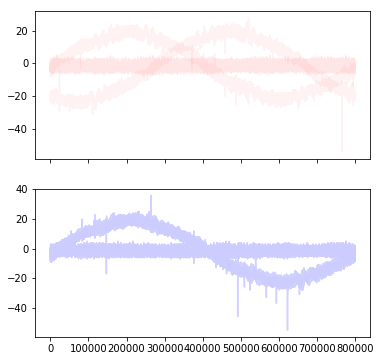

In [21]:
import matplotlib.pyplot as plt

# Load demo raw signals
import glob
nsigs=145
demo_raw = np.vstack([np.load(p) for p in sorted(glob.glob('../data/demo_chunks/*'))]).astype(np.int8)[nsigs:nsigs+4,:]
demo_pp = np.vstack([np.load(p) for p in sorted(glob.glob('../preprocessed_data/pp_demo_db20/*'))]).astype(np.int8)[nsigs:nsigs+4,:]

f, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(3*2, 3*2))

subfreq = 20
t = np.arange(0, demo_pp.shape[1], subfreq)
for i,(rs, pps) in enumerate(zip(demo_raw, demo_pp)):
    i *= 2                         
    axs[0].plot(t, rs[::subfreq], alpha=0.10, c=(1,0.5,0.5))
    axs[1].plot(t, pps[::subfreq], alpha=0.90, c=(0.8,0.8,1.0))          

In [52]:
pd.Series(demo_raw[114,:]).describe()

count    800000.000000
mean         -1.012639
std          13.621458
min         -33.000000
25%         -14.000000
50%          -1.000000
75%          12.000000
max          25.000000
dtype: float64

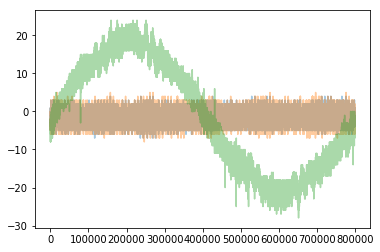

In [28]:
for n in np.arange(0,3):
    sns.lineplot(t, demo_raw[n,::subfreq], alpha=0.40)

In [2]:
import pandas as pd
base_feats = pd.read_hdf('../features/pp_train_db20_base-feats_v7_jan21.h5')

In [3]:
base_feats.head()

,num_peaks,mean_height,max_height,min_height,mean_width,max_width,min_width,std_width
0,23.0,0.478261,6.0,-4.0,830.704705,10740.625000,1.000000,2325.139040
1,9.0,0.444444,1.0,-2.0,1736.555556,15609.000000,2.000000,4904.649792
2,41.0,0.439024,5.0,-2.0,1079.960128,6657.916667,1.000000,1788.541750
3,60.0,-0.216667,6.0,-14.0,1626.497022,33856.875000,0.866667,4883.489134
4,41.0,0.073171,5.0,-7.0,1572.907404,41682.000000,0.625000,6555.521185


In [4]:
base_feats_2 = pd.read_hdf('../features/pp_train_db20_base-feats_v9_jan22_4band.h5')

In [6]:
base_feats_2.iloc[:5,0:20]

,num_peaks_0,mean_height_0,std_height_0,mean_width_0,max_width_0,std_width_0,num_peaks_1,mean_height_1,std_height_1,mean_width_1,max_width_1,std_width_1,num_peaks_2,mean_height_2,std_height_2,mean_width_2,max_width_2,std_width_2,num_peaks_3,mean_height_3
0,1.0,1.000000,0.000000,10740.625000,10740.625,0.000000,2.0,1.0,0.000000,2.000000,2.000000,0.000000,18.0,0.333333,2.403701,464.253388,3311.750000,1079.486935,2.0,1.000000
1,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.000000,3.000000,3.000000,0.000000,2.0,1.000000,0.000000,7805.500000,15609.000000,7803.500000,6.0,0.166667
2,2.0,0.000000,1.000000,1.500000,2.000,0.500000,2.0,-0.5,1.500000,2.166667,2.333333,0.166667,34.0,0.558824,2.031968,1301.926592,6657.916667,1889.152879,3.0,0.000000
3,47.0,-0.468085,3.009567,825.758610,11753.000,1960.842958,4.0,1.0,0.000000,13300.502083,33856.875000,12757.608255,6.0,0.333333,1.490712,784.126389,4144.600000,1516.260135,3.0,1.000000
4,32.0,0.281250,1.824047,522.897359,7141.000,1586.859755,8.0,-1.0,2.645751,5969.227679,41682.000000,13642.863645,1.0,2.000000,0.000000,2.000000,2.000000,0.000000,0.0,NaN


In [34]:
# load subs
sub_1 = pd.read_csv('../submissions/lgbm_v13_single_base_0.6139.csv')
sub_2 = pd.read_csv('../submissions/lgbm_stack_v1_0.6139.csv').values

In [7]:
np.sum(sub_1[:,1] - sub_2[:,1])

0

In [10]:
sub_1['id'] = np.repeat(np.arange(0, int(sub_1.shape[0]/3)), 3)

In [13]:
sub_1.groupby('id')['target'].sum().value_counts()

0    6385
1     188
2     132
3      74
Name: target, dtype: int64

In [36]:
raw_target = sub_1.values[:,1]
np.sum(raw_target)

674

In [37]:
num_lines = int(sub_1.shape[0]/3)
for line in range(num_lines):
    first_phase = line * 3
    if np.sum(raw_target[first_phase:first_phase+3]) > 1:
        raw_target[first_phase:first_phase+3] = 1

In [38]:
np.sum(raw_target)

806

In [40]:
# lets see
sub_1['target'] = raw_target

In [41]:
sub_1.to_csv('../submissions/postproc_betatest.csv', index=False)

In [63]:
a = pd.read_hdf('../level_1_preds/lgbm_v13r_v2_0.5567_test.h5')

In [65]:
nt = pd.read_csv('../submissions/lgbm_v16_no_thresh_0.6261.csv')

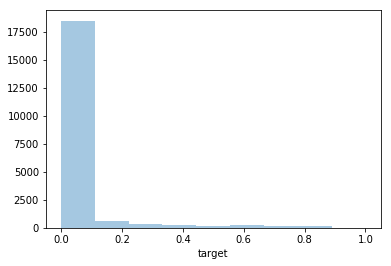

In [70]:
sns.distplot(nt['target'], kde=False, bins=np.linspace(0,1,10))